In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
df = pd.read_csv("C:/Users/HP/trainset.csv")
# import os
# print(os.listdir("../input"))
# print(os.listdir("C:/Users/HP/example.csv"))

In [2]:
print(df)

            Date         Open         High          Low        Close  \
0     2013-01-02   357.385559   361.151062   355.959839   359.288177   
1     2013-01-03   360.122742   363.600128   358.031342   359.496826   
2     2013-01-04   362.313507   368.339294   361.488861   366.600616   
3     2013-01-07   365.348755   367.301056   362.929504   365.001007   
4     2013-01-08   365.393463   365.771027   359.874359   364.280701   
...          ...          ...          ...          ...          ...   
1254  2017-12-22  1061.109985  1064.199951  1059.439941  1060.119995   
1255  2017-12-26  1058.069946  1060.119995  1050.199951  1056.739990   
1256  2017-12-27  1057.390015  1058.369995  1048.050049  1049.369995   
1257  2017-12-28  1051.599976  1054.750000  1044.770020  1048.140015   
1258  2017-12-29  1046.719971  1049.699951  1044.900024  1046.400024   

        Adj Close   Volume  
0      359.288177  5115500  
1      359.496826  4666500  
2      366.600616  5562800  
3      365.001007  

In [3]:
trainset = df.iloc[:,1:2].values

In [4]:
trainset

array([[ 357.385559],
       [ 360.122742],
       [ 362.313507],
       ...,
       [1057.390015],
       [1051.599976],
       [1046.719971]])

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(trainset)

In [6]:
training_scaled

array([[0.01011148],
       [0.01388614],
       [0.01690727],
       ...,
       [0.97543954],
       [0.9674549 ],
       [0.96072522]])

In [7]:
x_train = []
y_train = []

In [8]:
for i in range(60,1259):
    x_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [9]:
x_train.shape

(1199, 60)

In [10]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [12]:
regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))

In [13]:
regressor.add(Dropout(0.2))

In [14]:
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [15]:
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [16]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [17]:
regressor.add(Dense(units = 1))

In [18]:
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [19]:
regressor.fit(x_train,y_train,epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 16s 129ms/step - loss: 0.0284
Epoch 2/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0051
Epoch 3/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0039
Epoch 4/100
38/38 [==============================] - 5s 127ms/step - loss: 0.0037
Epoch 5/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0035
Epoch 6/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0038
Epoch 7/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0039
Epoch 8/100
38/38 [==============================] - 5s 118ms/step - loss: 0.0040
Epoch 9/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0033
Epoch 10/100
38/38 [==============================] - 5s 128ms/step - loss: 0.0029
Epoch 11/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0032
Epoch 12/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0032
Epoch 13/100

In [20]:
dataset_test =pd.read_csv("C:/Users/HP/testset.csv")

In [21]:
real_stock_price = dataset_test.iloc[:,1:2].values

In [22]:
dataset_total = pd.concat((df['Open'],dataset_test['Open']),axis = 0)
dataset_total

0       357.385559
1       360.122742
2       362.313507
3       365.348755
4       365.393463
          ...     
120    1143.599976
121    1128.000000
122    1121.339966
123    1102.089966
124    1120.000000
Name: Open, Length: 1384, dtype: float64

In [23]:
dataset_total = pd.concat((df['Open'],dataset_test['Open']),axis = 0)
dataset_total

0       357.385559
1       360.122742
2       362.313507
3       365.348755
4       365.393463
          ...     
120    1143.599976
121    1128.000000
122    1121.339966
123    1102.089966
124    1120.000000
Name: Open, Length: 1384, dtype: float64

In [24]:
inputs = dataset_total[len(dataset_total) - len(dataset_test)-60:].values
inputs

array([ 955.48999 ,  966.700012,  980.      ,  980.      ,  973.719971,
        987.450012,  992.      ,  992.099976,  990.289978,  991.77002 ,
        986.      ,  989.440002,  989.52002 ,  970.      ,  968.369995,
        980.      , 1009.190002, 1014.      , 1015.219971, 1017.210022,
       1021.76001 , 1022.109985, 1028.98999 , 1027.27002 , 1030.52002 ,
       1033.98999 , 1026.459961, 1023.419983, 1022.590027, 1019.210022,
       1022.52002 , 1034.01001 , 1020.26001 , 1023.309998, 1035.      ,
       1035.869995, 1040.      , 1055.089966, 1042.680054, 1022.369995,
       1015.799988, 1012.659973,  995.940002, 1001.5     , 1020.429993,
       1037.48999 , 1035.5     , 1039.630005, 1046.119995, 1045.      ,
       1054.609985, 1066.079956, 1075.199951, 1071.780029, 1064.949951,
       1061.109985, 1058.069946, 1057.390015, 1051.599976, 1046.719971,
       1048.339966, 1064.310059, 1088.      , 1094.      , 1102.22998 ,
       1109.400024, 1097.099976, 1106.300049, 1102.410034, 1132.

In [25]:
inputs = inputs.reshape(-1,1)

In [26]:
inputs

array([[ 955.48999 ],
       [ 966.700012],
       [ 980.      ],
       [ 980.      ],
       [ 973.719971],
       [ 987.450012],
       [ 992.      ],
       [ 992.099976],
       [ 990.289978],
       [ 991.77002 ],
       [ 986.      ],
       [ 989.440002],
       [ 989.52002 ],
       [ 970.      ],
       [ 968.369995],
       [ 980.      ],
       [1009.190002],
       [1014.      ],
       [1015.219971],
       [1017.210022],
       [1021.76001 ],
       [1022.109985],
       [1028.98999 ],
       [1027.27002 ],
       [1030.52002 ],
       [1033.98999 ],
       [1026.459961],
       [1023.419983],
       [1022.590027],
       [1019.210022],
       [1022.52002 ],
       [1034.01001 ],
       [1020.26001 ],
       [1023.309998],
       [1035.      ],
       [1035.869995],
       [1040.      ],
       [1055.089966],
       [1042.680054],
       [1022.369995],
       [1015.799988],
       [1012.659973],
       [ 995.940002],
       [1001.5     ],
       [1020.429993],
       [10

In [27]:
inputs = sc.transform(inputs)
inputs.shape

(185, 1)

In [28]:
x_test = []
for i in range(60,185):
    x_test.append(inputs[i-60:i,0])

In [29]:
x_test = np.array(x_test)
x_test.shape

(125, 60)

In [30]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(125, 60, 1)

In [31]:
predicted_price = regressor.predict(x_test)

4/4 [==============================] - 5s 53ms/step


In [32]:
predicted_price = sc.inverse_transform(predicted_price)
predicted_price

array([[1066.0559],
       [1064.2737],
       [1065.5454],
       [1072.2788],
       [1082.6188],
       [1093.7247],
       [1103.4971],
       [1108.7303],
       [1110.7604],
       [1110.6787],
       [1113.7063],
       [1119.0249],
       [1125.2687],
       [1130.8481],
       [1135.5999],
       [1142.1426],
       [1151.865 ],
       [1161.6586],
       [1169.3716],
       [1174.3925],
       [1176.0219],
       [1175.8397],
       [1174.3792],
       [1167.7314],
       [1154.3384],
       [1131.2279],
       [1111.6272],
       [1098.6013],
       [1087.4832],
       [1081.1326],
       [1079.1362],
       [1079.9796],
       [1085.2513],
       [1093.5891],
       [1101.7057],
       [1109.0121],
       [1115.5118],
       [1119.862 ],
       [1123.7094],
       [1128.9324],
       [1132.4067],
       [1131.5453],
       [1120.9487],
       [1107.6176],
       [1100.3817],
       [1099.5845],
       [1105.9453],
       [1118.2982],
       [1135.2013],
       [1152.0835],


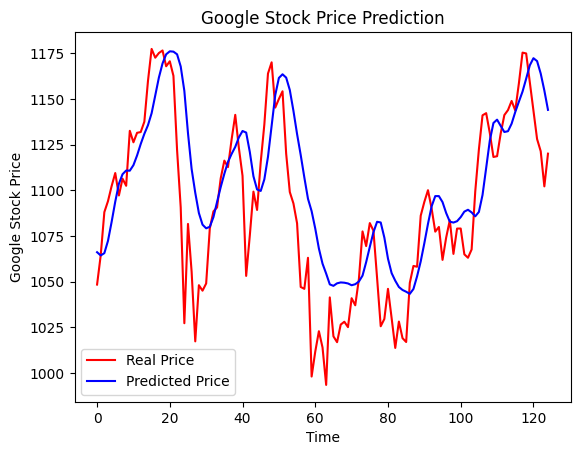

In [33]:
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()